      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


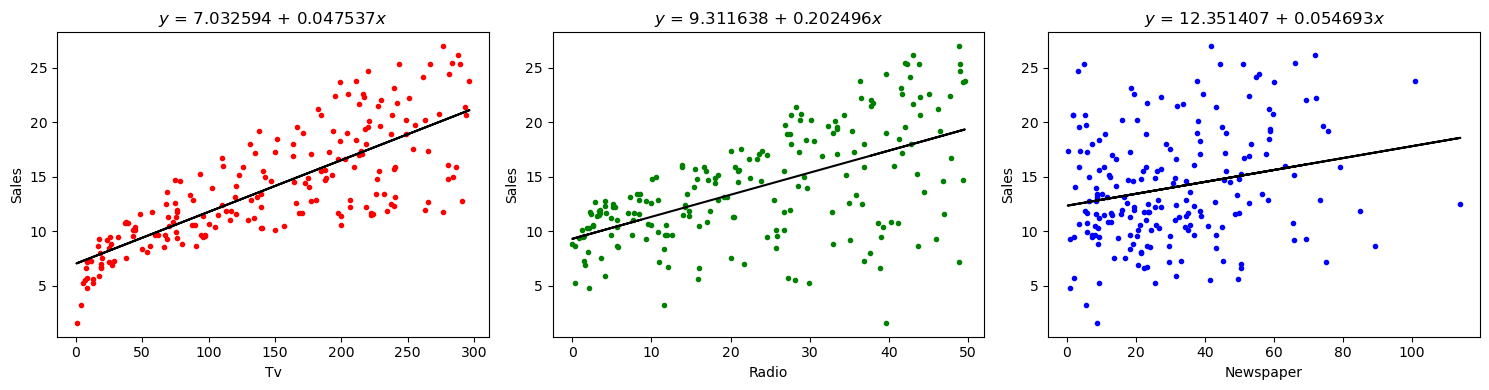

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

# Load the dataset from the URL
data_path = "https://www.statlearning.com/s/Advertising.csv" 
data_df = pd.read_csv(data_path, index_col=0)

# Print out first 5 samples from the DataFrame
print(data_df.head()) 

# Initialize figure and grid spec for plotting
fig = plt.figure(figsize=(15, 4))
gs = mpl.gridspec.GridSpec(1, 3)

# Function for training the model and plotting
def train_plot(data_df, feature, ax, c):
    # Initialize inputs (X) and outputs (Y)
    X = data_df[[feature]].values
    Y = data_df[["sales"]].values

    # Calculate the means of inputs and outputs
    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    # Total number of samples
    n = len(X)

    # Using the OLS formula to calculate b1 and b0 (slope and intercept)
    numerator = 0
    denominator = 0
    for i in range(n):
        numerator += (X[i] - x_mean) * (Y[i] - y_mean)
        denominator += (X[i] - x_mean) ** 2

    b1 = numerator / denominator
    b0 = y_mean - (b1 * x_mean)
    y_hat = b0 + np.dot(X, b1)

    # Convert b0 and b1 to scalars using .item()
    b0_scalar = b0.item()
    b1_scalar = b1.item()

    # Plot the regression line
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Sales")
    ax.set_title(("$y$ = %3f + %3f$x$" % (b0_scalar, b1_scalar)))

# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using Radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using Newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

# Display the plot
plt.tight_layout()
plt.show()
